<a href="https://colab.research.google.com/github/southeastwind13/deep-learning/blob/main/PYT001_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate 20 data points
N = 20

# random data on the x-axos in (-5, 5)
X = np.random.random(N)*10 - 5

# a lin plus some noise
Y = 0.5 * X - 1 + np.random.randn(N) # Add Gussien noise

#!
# Guassian noise have mean be zero.
# The MSE is good loss function for the data with Gussien noise

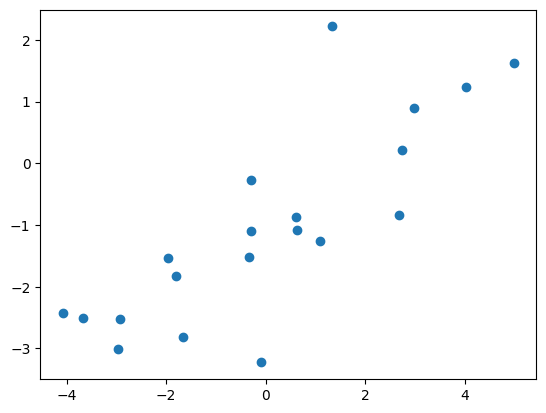

In [3]:
# Plot the data

plt.scatter(X, Y)

In [4]:
# Create model
model = nn.Linear(1, 1)

In [5]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
# Convert data from Array to Tensor

X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

#! Remark
# PyTorch uses float32 by default
# Numpy uses float64 by default

In [7]:
type(inputs)

torch.Tensor

In [8]:
# Train the model

n_epochs = 30
losses = []

for iteration in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {iteration+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch 1/30, Loss: 6.7338
Epoch 2/30, Loss: 1.4039
Epoch 3/30, Loss: 0.9785
Epoch 4/30, Loss: 0.9092
Epoch 5/30, Loss: 0.8786
Epoch 6/30, Loss: 0.8600
Epoch 7/30, Loss: 0.8481
Epoch 8/30, Loss: 0.8405
Epoch 9/30, Loss: 0.8357
Epoch 10/30, Loss: 0.8326
Epoch 11/30, Loss: 0.8306
Epoch 12/30, Loss: 0.8293
Epoch 13/30, Loss: 0.8285
Epoch 14/30, Loss: 0.8280
Epoch 15/30, Loss: 0.8276
Epoch 16/30, Loss: 0.8274
Epoch 17/30, Loss: 0.8273
Epoch 18/30, Loss: 0.8272
Epoch 19/30, Loss: 0.8271
Epoch 20/30, Loss: 0.8271
Epoch 21/30, Loss: 0.8271
Epoch 22/30, Loss: 0.8271
Epoch 23/30, Loss: 0.8271
Epoch 24/30, Loss: 0.8271
Epoch 25/30, Loss: 0.8270
Epoch 26/30, Loss: 0.8270
Epoch 27/30, Loss: 0.8270
Epoch 28/30, Loss: 0.8270
Epoch 29/30, Loss: 0.8270
Epoch 30/30, Loss: 0.8270


In [10]:
#! Convert Tensor to Python variable
# Single value  => Tensor.item()
# Array         => Tensor.numpy()

torch.Tensor

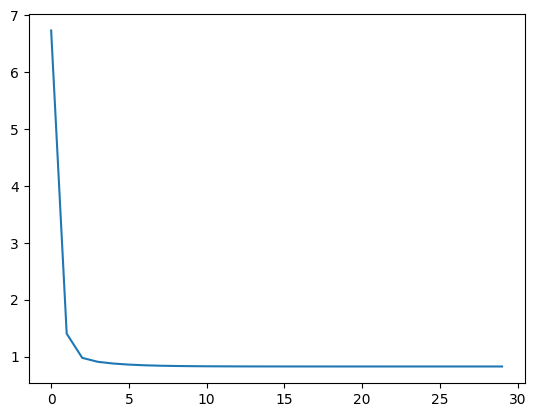

In [11]:
# Plot the loss per iteration
plt.plot(losses)

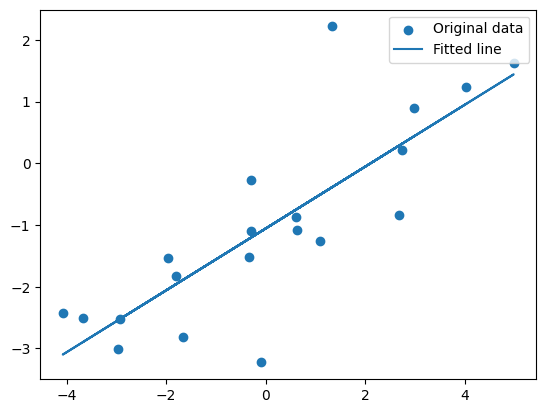

In [12]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Detach
# If we would like to use data from gradient we need to do the detach first.
# Tensor.detach().numpy()


In [13]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.50111955]] [-1.0563111]
